# Are Runtime and Ratings correlated?


Conclusions: there is no correlation between runtime and ratings

Reccomendtions: Do not factor runtime too much when deciding how to produce a movie, both long, short and middle lenght features can get good ratings, longer or shorter films do not reduce good ratings.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing web scraped data from "web scraping" notebook in this repo

df = pd.read_csv('cleandata/webscrape_top500grossfilms.csv', index_col = 0)

In [4]:
df.head()

,movie,imdb_rating,meta_score,runtime,gross,n_imdb
0,Star Wars: Episode VII - The Force Awakens,7.9,80.0,138,936.66,79.0
1,Black Panther,7.3,88.0,134,700.06,73.0
2,Avengers: Infinity War,8.5,68.0,149,678.82,85.0
3,Jurassic World,7.0,59.0,124,652.27,70.0
4,Avengers Assemble,8.0,69.0,143,623.28,80.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 6 columns):
movie          250 non-null object
imdb_rating    250 non-null float64
meta_score     250 non-null float64
runtime        250 non-null int64
gross          250 non-null float64
n_imdb         250 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


# Checking for Correlation 

In [6]:
df.corr()

,imdb_rating,meta_score,runtime,gross,n_imdb
imdb_rating,1.000000,0.750389,0.332263,0.286261,1.000000
meta_score,0.750389,1.000000,0.209758,0.256892,0.750389
runtime,0.332263,0.209758,1.000000,0.268408,0.332263
gross,0.286261,0.256892,0.268408,1.000000,0.286261
n_imdb,1.000000,0.750389,0.332263,0.286261,1.000000


# Comparing Distributions of IMDB Ratings and Metascore Ratings

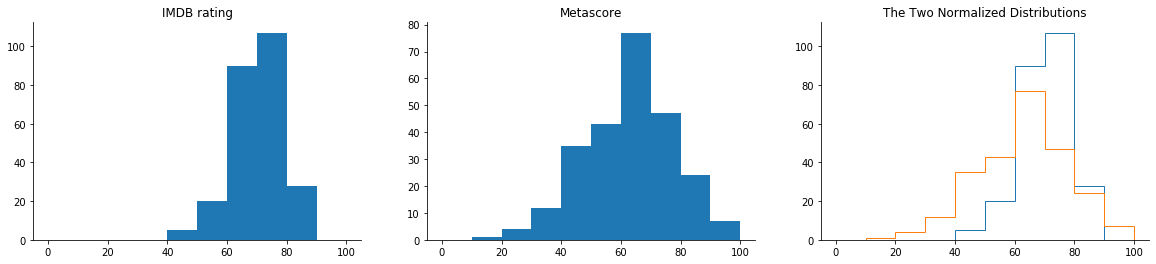

In [22]:
#initial investigation to see disribution of ratings, distributions are fairly even, with a slightly wider distribution for metacritic.
#discussed more in blog attached to repo

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(df['n_imdb'], bins = 10, range = (0,100))
ax1.set_title('IMDB rating')

ax2.hist(df['meta_score'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')

ax3.hist(df['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(df['meta_score'], bins = 10, range = (0,100), histtype = 'step')

ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()



# Comparing Metascore with gross revenue, runtime and imdb rating

Text(0, 0.5, 'IMDB Rating')

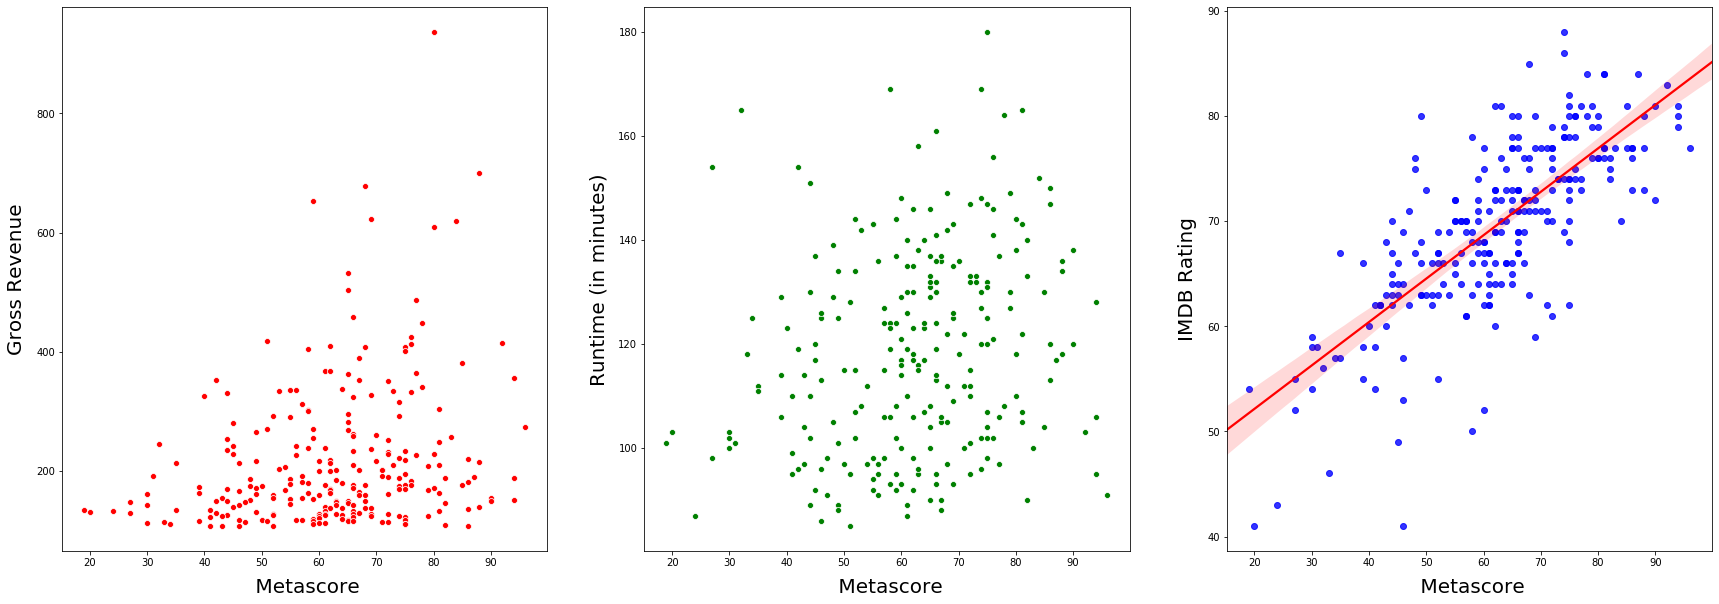

In [7]:
new_figure = plt.figure(figsize=(40,10))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)

sns.scatterplot(x='meta_score', y='gross',data= df, color = 'red', ax=ax1)
sns.scatterplot(x='meta_score', y='runtime',data= df, color = 'green', ax=ax2)
sns.regplot(x='meta_score', y='n_imdb',data= df, color = 'blue', ax=ax3, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

ax1.set_xlabel(' Metascore',labelpad =10, size = 20)
ax2.set_xlabel(' Metascore',labelpad =10, size = 20)
ax3.set_xlabel(' Metascore',labelpad =10, size = 20)

ax1.set_ylabel('Gross Revenue', labelpad = 10, size = 20)
ax2.set_ylabel('Runtime (in minutes)', labelpad = 10, size =20)
ax3.set_ylabel('IMDB Rating', labelpad = 10, size =20)


# Comparing Runtime with IMBD and Meta

Text(0, 0.5, 'IMDB Rating')

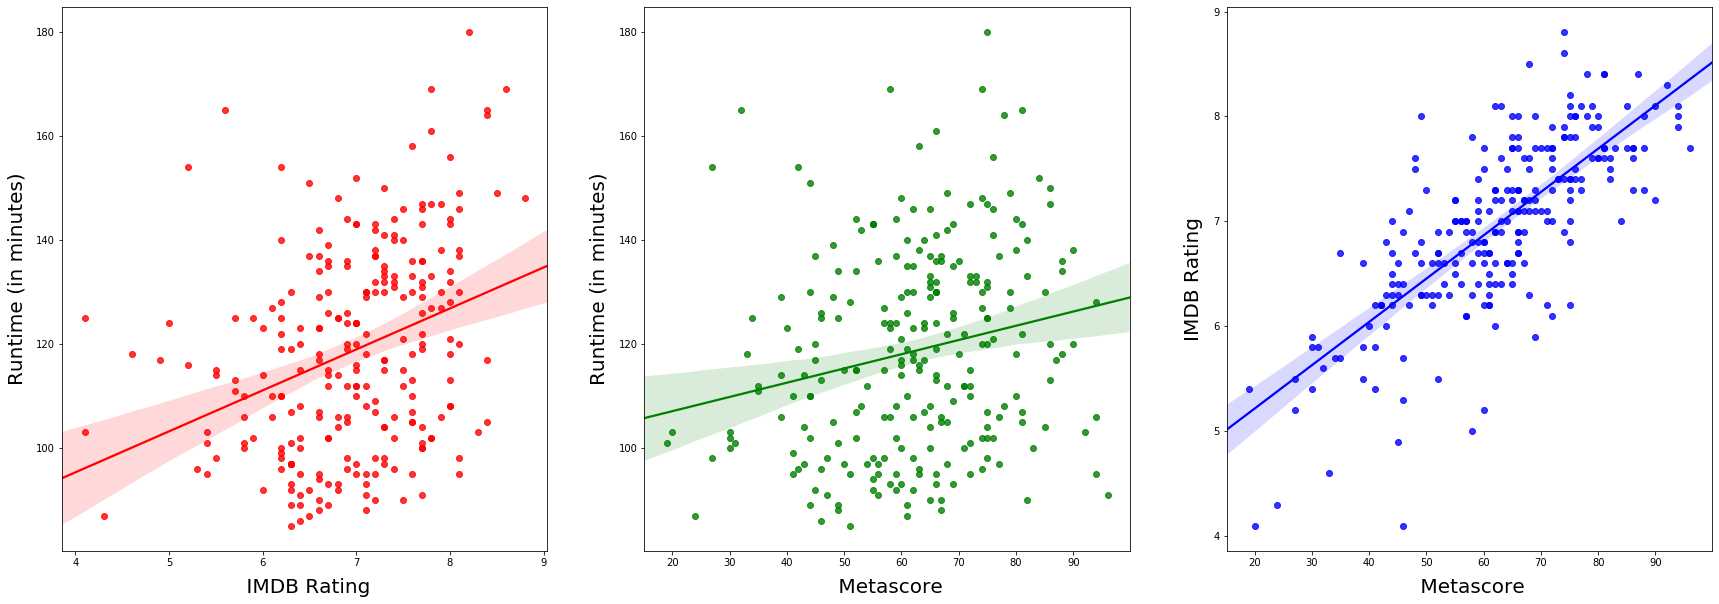

In [8]:
new_figure = plt.figure(figsize=(40,10))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)

sns.regplot(x='imdb_rating', y='runtime',data= df, color = 'red', ax=ax1)
sns.regplot(x='meta_score', y='runtime',data= df, color = 'green', ax=ax2)
sns.regplot(x='meta_score', y='imdb_rating',data= df, color = 'blue', ax=ax3)


ax1.set_xlabel(' IMDB Rating',labelpad =10, size = 20)
ax2.set_xlabel(' Metascore',labelpad =10, size = 20)
ax3.set_xlabel(' Metascore',labelpad =10, size = 20)


ax1.set_ylabel('Runtime (in minutes)', labelpad = 10, size = 20)
ax2.set_ylabel('Runtime (in minutes)', labelpad = 10, size =20)
ax3.set_ylabel('IMDB Rating', labelpad = 10, size =20)


In [ ]:
# graphs show no correlation 

# Comparing IMDB Ratings with gross revenue, runtime and metascore rating


Text(0, 0.5, 'MetaScore')

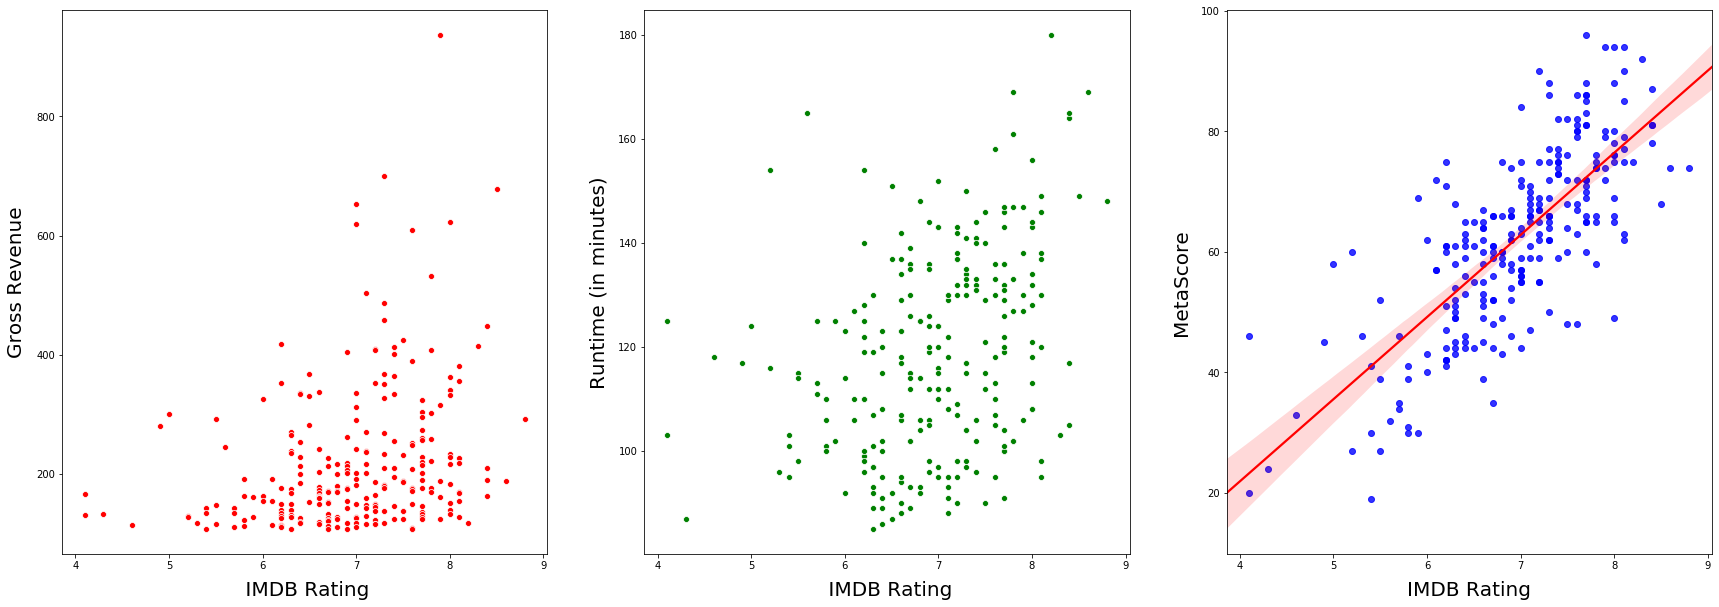

In [9]:
new_figure = plt.figure(figsize=(40,10))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)

sns.scatterplot(x='imdb_rating', y='gross',data= df, color = 'red', ax=ax1)
sns.scatterplot(x='imdb_rating', y='runtime',data= df, color = 'green', ax=ax2)
sns.regplot(x='imdb_rating', y='meta_score',data= df, color = 'blue', ax=ax3, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

ax1.set_xlabel(' IMDB Rating',labelpad =10, size = 20)
ax2.set_xlabel(' IMDB Rating',labelpad =10, size = 20)
ax3.set_xlabel('IMDB Rating', labelpad =10, size = 20)

ax1.set_ylabel('Gross Revenue', labelpad = 10, size = 20)
ax2.set_ylabel('Runtime (in minutes)', labelpad = 10, size =20)
ax3.set_ylabel('MetaScore', labelpad = 10, size =20)


In [ ]:
#unsuprisingly, the imdb ratings show that the higher they are the more gross revenue can be expected

In [ ]:
#Graphs show that there is no correlation between runtime and ratings for both imdb and meta critic.

#would possible include analysis from more ratings sites in the future 